In [1]:
import pandas as pd
import numpy as np
import scipy.io

In [ ]:

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
df = scipy.io.loadmat('/home/karanvora/Documents/New York University/Classes/Semester 1/Machine Learning/Assignments/Assignment 1/dataset4.mat');
x = np.array(df.get('X'))
y = np.array(df.get('Y'))

In [3]:
x.shape

(200, 3)

In [4]:
y.shape

(200, 1)

In [5]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [6]:
def gradients(x, y, y_hat):
    
    m = x.shape[0]
    
    dw = (1/m)*np.dot(x.T, (y_hat - y))
    
    return dw

In [7]:
def train(x, y, lr):
    
    m, n = x.shape
    
    # Randomly initializing weights .
    w = np.random.rand(x.shape[1],1)
    
    y = y.reshape(m,1)
    
    errors = []
    
    # Training loop.
    count = 0;
    iterations = []
    while(True):
            
        # predicted label value
        y_hat = sigmoid(np.dot(x, w))

        dw = gradients(x, y, y_hat)
        
        # Updating the parameters.
        w -= lr*dw
      

        epsilon = np.linalg.norm(lr*dw);
       
        if(epsilon < 0.001): 
          print(epsilon, count);
          break

        # Calculating loss and appending it in the list.
        err = -np.mean( (y-1)*np.log(1-y_hat) - y*np.log(y_hat) )

        errors.append(err);
        iterations.append(count);

      
        count+=1;
  
    return w, errors, iterations

In [8]:
# Training 
w, error, iterations = train(x, y, lr=0.1)


0.0009999179513729536 6642


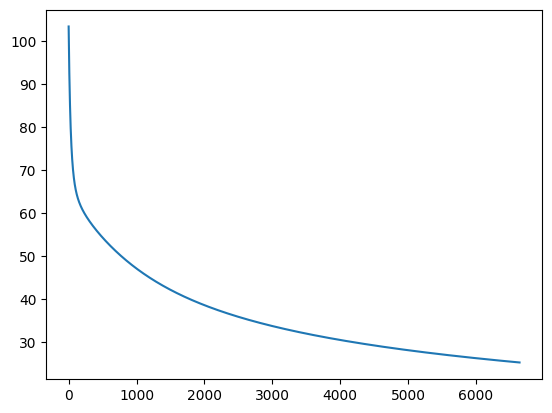

In [9]:
import matplotlib.pyplot as plt
plt.plot(iterations, error);
plt.show();

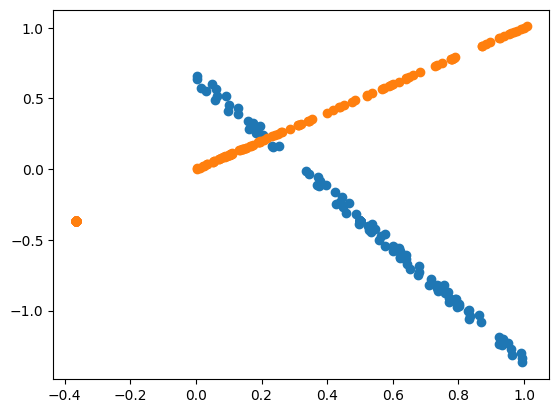

In [10]:
from numpy import where

row_zeros = where(y==0)
row_ones = where(y==1)
plt.scatter(x[row_zeros,0], x[row_zeros,1])
plt.scatter(x[row_ones,1], x[row_ones,1])
plt.show()



In [11]:
 a = np.ones((10,50))
b = np.zeros((10,50))
np.sum(a-b)

500.0